In [1]:
# Import standard packages
import itertools
import numpy as np
import pandas as pd 
from numbers import Number
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler, OneHotEncoder
%matplotlib inline

In [2]:
# Import the data
df = pd.read_csv("./data/ln_price_dataframe")
df

,id,date,ln_price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,12.309982,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,13.195614,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,12.100712,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,13.311329,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,13.142166,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,12.793859,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,12.899220,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,12.904459,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,12.899220,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [3]:
df['date'].value_counts()

6/23/2014    142
6/25/2014    131
6/26/2014    131
7/8/2014     127
4/27/2015    126
            ... 
8/3/2014       1
3/8/2015       1
11/2/2014      1
5/24/2015      1
1/31/2015      1
Name: date, Length: 372, dtype: int64

In [4]:
df = df.drop(df[['date', 'view', 'waterfront','condition','grade','zipcode','lat', 'long' ]], axis = 1)
df.head()

,id,ln_price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,7129300520,12.309982,3,1.00,1180,5650,1.0,1180,0.0,1955,0.0,1340,5650
1,6414100192,13.195614,3,2.25,2570,7242,2.0,2170,400.0,1951,1991.0,1690,7639
2,5631500400,12.100712,2,1.00,770,10000,1.0,770,0.0,1933,NaN,2720,8062
3,2487200875,13.311329,4,3.00,1960,5000,1.0,1050,910.0,1965,0.0,1360,5000
4,1954400510,13.142166,3,2.00,1680,8080,1.0,1680,0.0,1987,0.0,1800,7503


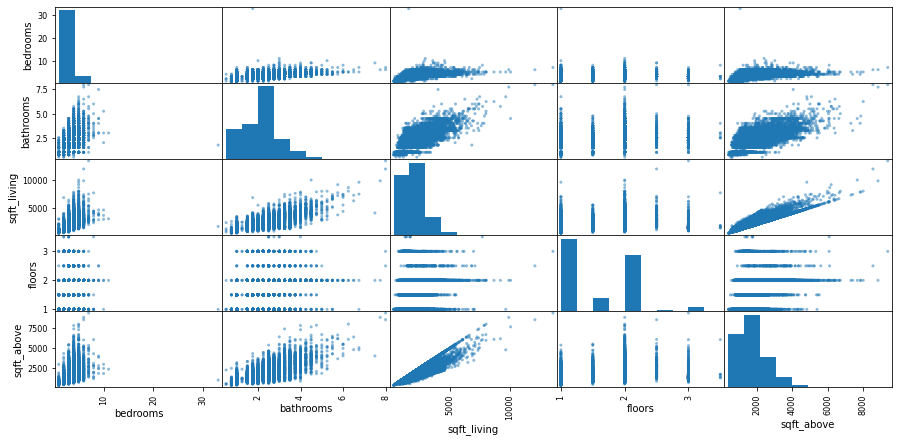

In [25]:
pd.plotting.scatter_matrix(df[['bedrooms','bathrooms','sqft_living','floors','sqft_above',]], figsize = (15,7));



In [5]:
df.loc[df['bedrooms'] == 33]



,id,ln_price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
15856,2402100895,13.369223,33,1.75,1620,6000,1.0,1040,580.0,1947,0.0,1330,4700


In [6]:
df['ln_price'].describe()



count    21597.000000
mean        13.048211
std          0.526555
min         11.264464
25%         12.682307
50%         13.017003
75%         13.377006
max         15.856731
Name: ln_price, dtype: float64

In [7]:
df['ln_price'].value_counts

<bound method IndexOpsMixin.value_counts of 0        12.309982
1        13.195614
2        12.100712
3        13.311329
4        13.142166
           ...    
21592    12.793859
21593    12.899220
21594    12.904459
21595    12.899220
21596    12.691580
Name: ln_price, Length: 21597, dtype: float64>

In [8]:
df75 = df.loc[df['ln_price'] >= 13.377006]
df75


,id,ln_price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
5,7237550310,14.022525,4,4.50,5420,101930,1.0,3890,1530.0,2001,0.0,4760,101930
10,1736800520,13.403776,3,2.50,3560,9796,1.0,1860,1700.0,1965,0.0,2210,8925
15,9297300055,13.384728,4,3.00,2950,5000,2.0,1980,970.0,1979,0.0,2140,4000
21,2524049179,14.508658,3,2.75,3050,44867,1.0,2330,720.0,1968,0.0,4110,20336
26,1794500383,13.750439,3,1.75,2450,2691,2.0,1750,700.0,1915,NaN,1760,3573
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21580,7502800100,13.429775,5,2.75,3600,9437,2.0,3600,0.0,2014,0.0,3550,9421
21581,191100405,14.272935,4,3.25,3410,10125,2.0,3410,?,2007,NaN,2290,10125
21583,7202300110,13.604790,4,3.00,3990,7838,2.0,3990,0.0,2003,NaN,3370,6814
21584,249000205,14.247293,5,3.75,4470,8088,2.0,4470,0.0,2008,0.0,2780,8964


In [9]:
df75.describe()

,id,ln_price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,5.371000e+03,5371.000000,5371.000000,5371.000000,5371.000000,5.371000e+03,5371.000000,5371.000000,5371.000000,4419.000000,5371.000000,5371.000000
mean,4.508528e+09,13.732997,3.823869,2.675061,2999.178551,2.136319e+04,1.712903,2534.302365,1972.849562,159.257751,2618.602309,16300.245950
std,2.935889e+09,0.339284,0.893738,0.789327,1027.105896,6.049521e+04,0.496411,983.635281,32.549611,541.407190,782.286098,35311.283208
min,1.200019e+06,13.377780,1.000000,0.750000,890.000000,5.200000e+02,1.000000,580.000000,1900.000000,0.000000,860.000000,967.000000
25%,1.939000e+09,13.491856,3.000000,2.250000,2330.000000,5.400000e+03,1.000000,1760.000000,1951.000000,0.000000,2020.000000,5250.500000
50%,3.885804e+09,13.624350,4.000000,2.500000,2880.000000,8.580000e+03,2.000000,2430.000000,1981.000000,0.000000,2570.000000,8416.000000
75%,7.301100e+09,13.864301,4.000000,3.250000,3510.000000,1.434750e+04,2.000000,3160.000000,2001.000000,0.000000,3130.000000,12911.500000
max,9.839301e+09,15.856731,10.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,6210.000000,871200.000000


In [10]:
data = df75['ln_price']
stats.norm.interval(alpha=0.95, loc=np.mean(data), scale=stats.sem(data))

(13.723923679290353, 13.742071057169914)

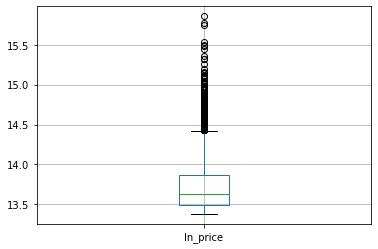

In [11]:
boxplot = df75.boxplot(column = "ln_price")

In [12]:
data = df75
X= df75.drop('ln_price', axis =1)
y = df75['ln_price']

In [14]:
equasion = 'ln_price ~ bedrooms'
sqft_mod = ols(formula = equasion, data = data).fit()

In [15]:
sqft_mod_summ = sqft_mod.summary()
sqft_mod_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     264.3
Date:                Wed, 26 Oct 2022   Prob (F-statistic):           4.81e-58
Time:                        17:31:52   Log-Likelihood:                -1686.0
No. Observations:                5371   AIC:                             3376.
Df Residuals:                    5369   BIC:                             3389.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.4186      0.020    675.590      0.000      13.380      13.458
bedrooms       0.0822      0.005     16.256      0.000       0.072       0.092
==============================================================================
Omnibus:                     1552.735   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4081.074
Skew:                           1.560   Prob(JB):                         0.00
Kurtosis:                       5.915   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
equasion = 'ln_price ~ bedrooms + sqft_living + bathrooms + floors'
sqft_bath_floors_mod = ols(formula = equasion, data = data).fit()

In [19]:
sqft_bath_floors_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     833.9
Date:                Wed, 26 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:32:54   Log-Likelihood:                -516.83
No. Observations:                5371   AIC:                             1044.
Df Residuals:                    5366   BIC:                             1077.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      13.2254      0.019    686.584      0.000      13.188      13.263
bedrooms       -0.0320      0.005     -6.908      0.000      -0.041      -0.023
sqft_living     0.0002   5.41e-06     36.892      0.000       0.000       0.000
bathrooms       0.0363      0.007      5.084      0.000       0.022       0.050
floors         -0.0382      0.008     -4.858      0.000      -0.054      -0.023
==============================================================================
Omnibus:                      661.139   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1001.420
Skew:                           0.893   Prob(JB):                    3.50e-218
Kurtosis:                       4.134   Cond. No.                     1.73e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<ipython-input-23-6d21a91841cc>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  EZ.set_yticklabels(labels = ylabels)


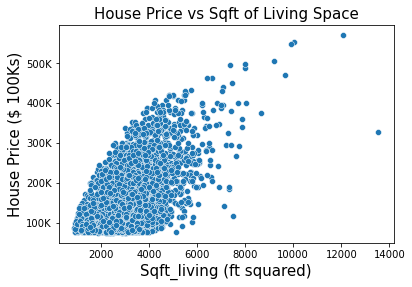

In [23]:
EZ =sns.scatterplot(data=data, x="sqft_living", y="ln_price")

ylabels = ['0', '100K', '200K', '300K', '400K', '500K', '600K', '700K', '800K']
EZ.set_yticklabels(labels = ylabels)
plt.xlabel('Sqft_living (ft squared)', size = 15)
plt.ylabel('House Price ($ 100Ks)', size = 15)
plt.title('House Price vs Sqft of Living Space', size = 15)

plt.show()